In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base() 

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date 

('2017-08-23',)

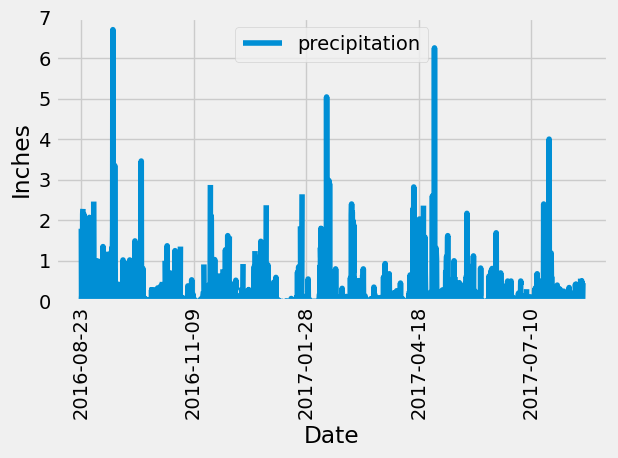

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=366)
year_ago
# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(Measurement.date, 
                        Measurement.prcp).\
                  filter(Measurement.date > year_ago).all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation, columns=['date', 'precipitation'])

# Sort the dataframe by date
precipitation_df.set_index('date', inplace=True)
precipitation_df.sort_values(by='date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot()
plt.ylim(0,7)
plt.xticks(rotation="vertical")
plt.xlabel('Date')
plt.ylabel('Inches')
plt.tight_layout()
plt.show()

In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset
session.query(Measurement.station).distinct().count()

9

In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
grouped_by_station_id = session.query(Measurement.station, func.count(Measurement.station)).\
                                      group_by(Measurement.station).\
                                      order_by(func.count(Measurement.station).desc()).all()
grouped_by_station_id

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_id = grouped_by_station_id[0]
filtered_by_most_active = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),
                                        func.avg(Measurement.tobs)).filter(Measurement.station==most_active_id[0]).all()
filtered_by_most_active

[(54.0, 85.0, 71.66378066378067)]

Text(0, 0.5, 'Frequency')

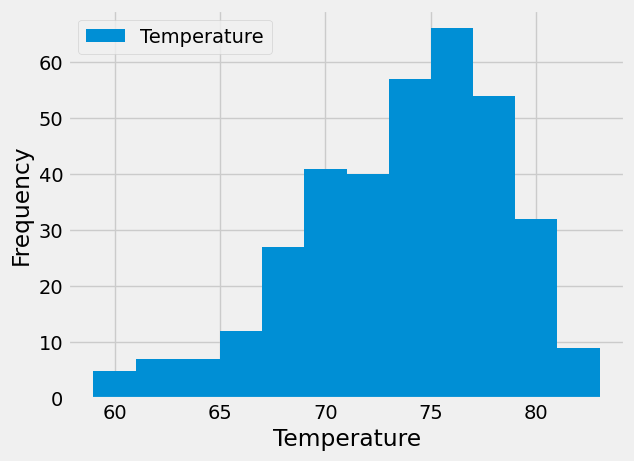

In [21]:
# Using the most active station id
# Find the most recent date in the data set for the most active station.
most_active_station_recent_date = session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.station =='USC00519281').\
    order_by(Measurement.date.desc()).first()

# Calculate the date one year from the last date in data set for the most active station.
twelve_months = dt.date(2017, 8, 18) - dt.timedelta(days=366)

# Query the last 12 months of temperature observation data for this station
station_temperature = session.query(Measurement.date,Measurement.tobs).\
                          filter(Measurement.station =='USC00519281').\
                          filter(Measurement.date > twelve_months).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
temperature_df = pd.DataFrame(station_temperature, columns = ["Date","Temperature"])

# plot the results as a histogram
temperature_df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Close Session

In [22]:
# Close Session
session.close()